In [157]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [158]:
# initialization
t = 0 # time step
m = 5 # number of nodes
r = 0.2 # poisson process rate lambda/m
rp = 0.2 # retransmission probability

In [159]:
def poisson_process(rate):
    p_0_arrive = math.exp(-1*rate)
    p_1_arrive = math.exp(-1*rate) * rate 
    
    result = -1

    p = random.random()
    if p < p_0_arrive:
        result = 0 # no packet was transmitted
    elif p < (p_0_arrive+p_1_arrive):
        result = 1 # one packet was transmitted
    else: 
        result = math.e # more than one packets were transmitted
        
    return result

In [160]:
def retransmission(retrans_rate):
    p = random.random()
    result = -1 # assume the node is still backlogged
    # if we are in the success region of retransmission rate 
    if p < retrans_rate: 
        result = 1 # then transmit
    return result

In [161]:
def update_status(node, channel_status):
    result = -1
    if channel_status == 0 or channel_status == 1: # if the channel is not in a collision
        if node == 0 or node == 1 : # the node transmitted 0 or 1 packet in the previous time unit
            # (and it was not pending for retransmission)
            # which means it is ready to transmit this time
            result = poisson_process(r) # determine how many packets to be transmitted this time
        else: # if the node is backlogged and wait for retransmission
            result = retransmission(rp)

    else: # if the channel is in a collision
        if node == 0: # if the node didn't try to send a packet
            result = 0 # no new arrivals
        else: # node is -1, 1, or e, the node had something to be sent
            result = retransmission(rp) # determine if it will be retransmitted
    return result
        

For the node status:
* 0 means no packet sending this time unit
* 1 means one packet sending this time unit
* e means multiple packets sending this time unit
* -1 means backlogged and wait for retransmission

In [162]:
random.seed(1)
stop = 100 # what time step to stop
nodes_status = [0]*m # -1 means pending for transmission
channel_status = 0 # initial channel status; ready for transmission
time_node_status = [[-1]*m]*stop # used to keep track of the nodes status each time
time_channel_status = [-1] * stop # used to keep track of the channel status each time
while t < stop:
    nodes_status = [update_status(node, channel_status) for node in nodes_status]

    if nodes_status.count(math.e) > 0 or nodes_status.count(1) > 1:
        # if a node already sent multiple packets or multiple nodes sent packets
        channel_status = math.e
    elif nodes_status.count(1) == 1:
        # only one node sent one packet
        channel_status = 1
    else: 
        # no node sent anything
        channel_status = 0

        
    time_node_status[t] = nodes_status # keep track of node status
    time_channel_status[t] = channel_status # keep track of channel status
    t += 1 # increment time step

([<matplotlib.axis.YTick at 0x11b4a4ca0>,
 [Text(0, 0.0, 'no packet sent'),
  Text(0, 1.0, '1 packet sent'),
  Text(0, 2.718281828459045, 'in collision')])

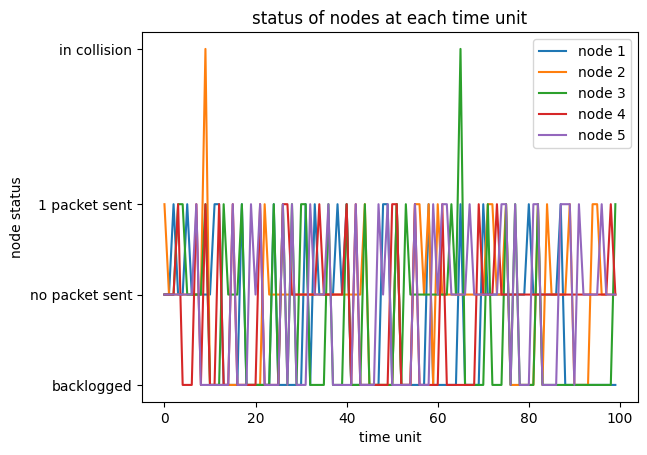

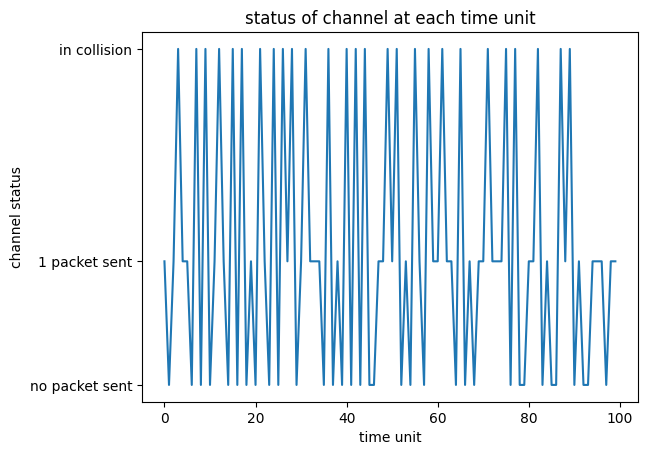

In [163]:
plt.figure()
plt.plot(np.arange(stop), np.array(time_node_status))
plt.xlabel('time unit')
plt.ylabel('node status')
plt.title('status of nodes at each time unit')
plt.legend(['node 1', 'node 2', 'node 3', 'node 4', 'node 5'])
plt.yticks([-1, 0, 1, math.e], ['backlogged', 'no packet sent', '1 packet sent', 'in collision'])

plt.figure()
plt.plot(np.arange(stop), np.array(time_channel_status))
plt.xlabel('time unit')
plt.ylabel('channel status')
plt.title('status of channel at each time unit')
plt.yticks([0, 1, math.e], ['no packet sent', '1 packet sent', 'in collision'])

In [165]:
# determine the steady state probability of each state, n = 0, 1, 2, 3, 4, 5, where n is the number of backlogged states 

total_num_backblogged = [0]*(m+1) # keeps track of how many times in total with n states backlogged
# ith element in total_num_backblogged represents how many times in total with i states backlogged
total_num_steadystate = [0]*(m+1) # keeps track of how many times in steadt states with n states backlogged

# run through each time unit
for index, status in enumerate(time_node_status):
    
    # if there are i backlogged states in this time unit, ith element in total_num_backblogged increment
    num_backlogged = status.count(-1)
    total_num_backblogged[num_backlogged] += 1
    
    # if there are i backlogged states when there's a steady state, ith element in total_num_steadystate increment
    if time_channel_status[index] == 0 or time_channel_status[index] == 1:
        total_num_steadystate[num_backlogged] += 1
        
        

In [166]:

total_num_backblogged, total_num_steadystate

([9, 22, 26, 22, 17, 4], [3, 11, 21, 17, 17, 4])